Descriptive analysis on the UNHCR data

In [133]:
import pandas as pd
import igraph as ig
import matplotlib.colors as mcolors
#from chord import Chord

df = pd.read_csv('../../data/data.csv', engine="pyarrow").drop('', axis=1)

Interestingly enough there are some duplicates:

In [134]:
counts = df.value_counts(subset=['Country_d','Country_o','year']).to_frame(name='counts')
counts = counts[counts.counts > 1].reset_index()
counts
# counts

,Country_d,Country_o,year,counts
0,Antigua and Barbuda,Taiwan Province of China,2017,2
1,Antigua and Barbuda,Dominica,2022,2
2,Antigua and Barbuda,Dominica,2012,2
3,Antigua and Barbuda,Dominica,2013,2
4,Antigua and Barbuda,Dominica,2014,2
...,...,...,...,...
9745,Hong Kong SAR,Antigua and Barbuda,2023,2
9746,Hong Kong SAR,Antigua and Barbuda,2024,2
9747,Benin,Antigua and Barbuda,2012,2
9748,Benin,Antigua and Barbuda,2011,2


In [135]:
df[(df.Country_o == 'Antigua and Barbuda') & (df.Country_d == 'Taiwan Province of China') & (df.year == 2017)].area_o

32984    442.0
32985    960.0
Name: area_o, dtype: float64

We will have to look into why these are duplicated, it is my understanding that these shouldn't be here.

In [136]:
df.drop_duplicates(subset=['Country_o','Country_d','year'], inplace=True)

In [152]:
import numpy as np
def map_to_region(country_column):
    africa = ['The Gambia','Côte d\'Ivoire', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

    north_america = ['Canada', 'Mexico', 'United States', 'The Bahamas', 'Puerto Rico']

    former_soviet_union = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

    south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

    west_asia = ['Bahrain', 'Cyprus', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Islamic Republic of Iran', 'Türkiye', 'West Bank and Gaza']

    southeast_asia = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam', 'Lao P.D.R.']

    oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

    latin_america = ['St. Lucia', 'St. Vincent and the Grenadines', 'St. Kitts and Nevis', 'São Tomé and Príncipe', 'Aruba', 'Antigua and Barbuda', 'Argentina', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela']
    europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Uzbekistan']
    east_asia = ['China','Hong Kong SAR','Japan','Korea', 'Macao SAR', 'Mongolia', 'Taiwan Province of China']

    region_column = []
    for country in country_column:
        if country in africa:
            region_column.append('Africa')
        elif country in north_america:
            region_column.append('North America')
        elif country in former_soviet_union:
            region_column.append('Fmr Soviet Union')
        elif country in south_asia:
            region_column.append('South Asia')
        elif country in west_asia:
            region_column.append('West Asia')
        elif country in southeast_asia:
            region_column.append('Southeast Asia')
        elif country in oceania:
            region_column.append('Oceania')
        elif country in latin_america:
            region_column.append('Latin America')
        elif country in europe:
            region_column.append('Europe')
        elif country in east_asia:
            region_column.append('East Asia')
        else:
            region_column.append(np.nan)
    return region_column

df['Region_o'] = map_to_region(df.Country_o)
df['Region_d'] = map_to_region(df.Country_d)


Most emigration in latin america?

Venezuela ranks at the top.

In [15]:
df[df['Region_o'] == 'Latin America'].groupby(['iso_o','year'], as_index=False).agg({'newarrival':'sum' }).sort_values(by='newarrival', ascending=False).head(10)

,iso_o,year,newarrival
793,VEN,2018,2508056.5
794,VEN,2019,1524435.0
796,VEN,2021,664573.0
795,VEN,2020,572356.0
792,VEN,2017,125916.0
546,NIC,2021,111562.0
419,HND,2019,80618.0
446,HTI,2021,67019.0
642,SLV,2017,65477.0
369,GTM,2019,60288.0


In [15]:
def assign_colors(s, palette=None):
    unique_values = s.unique()
    if palette is None:
        colors = mcolors.TABLEAU_COLORS
        palette = pd.Series(colors).sample(len(unique_values), random_state=42)

    color_dict = dict(zip(unique_values, palette))
    rgb_dict = {k: mcolors.to_rgb(v) for k, v in color_dict.items()}

    # Create color-mapped values and legend plot
    color_mapped_values = s.map(rgb_dict).tolist()

    return color_mapped_values

Visualization

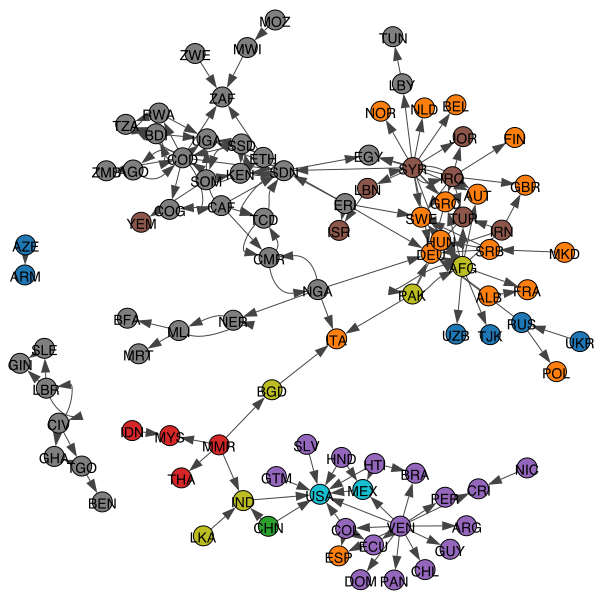

In [44]:

# graph_df = df[df.contig.astype(bool) & (df.newarrival > 500)].sort_values(by='newarrival', ascending=False).drop_duplicates(subset=['iso_o', 'iso_d'])
graph_df = df[(df.newarrival > 10000)].groupby(['iso_o','iso_d'], as_index=False).agg({'newarrival':'max','dist':'first','pop_o':'first'})

graph = ig.Graph.TupleList(graph_df[['iso_o','iso_d','dist']].itertuples(index=False), directed=True, edge_attrs=['dist'])

graph.vs['color'] = assign_colors(pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['Region_o'])
graph.vs['label'] = graph.vs['name']

vs_size = np.emath.logn(1.2, pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['pop_o'])

layout = graph.layout("kk")
ig.plot(graph)

Plotting country coordinate data:

Still have yet to do this.

In [19]:
country_coordinate_url = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
country_coordinate = pd.read_csv(country_coordinate_url).apply(lambda x: x.str.replace('"',''))
country_coordinate[['Latitude (average)', 'Longitude (average)']] = country_coordinate[['Latitude (average)', 'Longitude (average)']].apply(lambda x: x.astype(float))

In [83]:
def plot_country_data(df, country, year, min_size = 0):
    iso_o = df[df.Country_o == country].iso_o.iloc[0]


    o_obs = df[(df.Country_o == country) & (df.year == year)].agg({'newarrival':'sum'}).rename('newarrival')
    o_obs.index = [iso_o]
    o_obs = o_obs.to_frame()

    df1 = df[(df.Country_o == country) & (df.year== year)].groupby('iso_d').agg({'newarrival':'sum'})
    df1 = df1[df1.newarrival > min_size]
    df1 = pd.concat([df1, o_obs], axis=0) 
    df1['location'] = ['origin' if country == iso_o else 'destination' for country in df1.index]
    df1 = df1.rename_axis('iso').reset_index()

    return df1  

plot_country_data(df, 'Venezuela', 2018, 1000) 

,iso,newarrival,location
0,ARG,71414.0,destination
1,BRA,92922.0,destination
2,CAN,1254.0,destination
3,CHL,286788.0,destination
4,COL,1105410.0,destination
5,CRI,2884.0,destination
6,ECU,226614.5,destination
7,ESP,20015.0,destination
8,GUY,21400.0,destination
9,MEX,23469.0,destination


In [111]:
import mpl_toolkits
import basemap

ModuleNotFoundError: No module named 'basemap'

In [114]:
!pip install basemap

  Using cached basemap-1.3.6.zip (156 kB)
  Installing build dependencies ... |^C
anceled
ERROR: Operation cancelled by user


In [ ]:
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.pyplot as plt

plt.figure(figsize = (10,9))

basemap = Basemap(
    projection = 'merc',
    llcrnrlon = -180, 
    urcrnrlon = -50,     
    llcrnrlat = -10,  
    urcrnrlat = 70,    
    lat_ts = 0,
    resolution = 'l',
    suppress_ticks = True)

In [93]:
import plotly.express as px

fig = px.scatter_geo(plot_country_data(df, 'Venezuela', 2018, 1000), locations="iso",
                     size="newarrival",
                     # projection="natural earth",
                     color = 'location',
                     title = 'Venezuela in 2018'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple"
)
fig.show()

In [89]:
fig = px.scatter_geo(plot_country_data(df, 'Colombia', 2018, 1000), locations="iso",
                     size="newarrival",
                     #projection="natural earth",
                     color = 'location'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")
fig.show()

In [99]:
fig = px.scatter_geo(plot_country_data(df, 'Nicaragua', 2021, 1000), locations="iso",
                     size="newarrival",
                     #projection="natural earth",
                     color = 'location'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")
fig.show()

<Axes: xlabel='contig'>

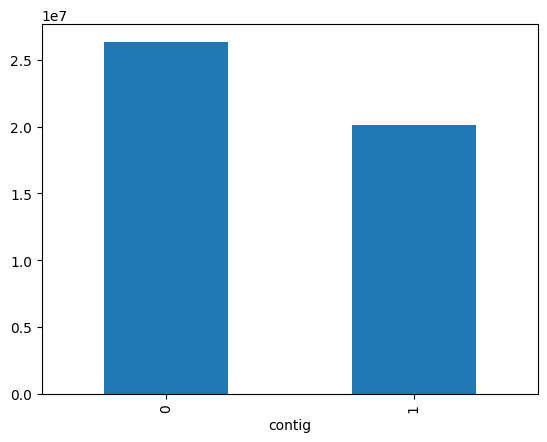

In [9]:
df.groupby('contig').sum('newarrival').newarrival.plot.bar()

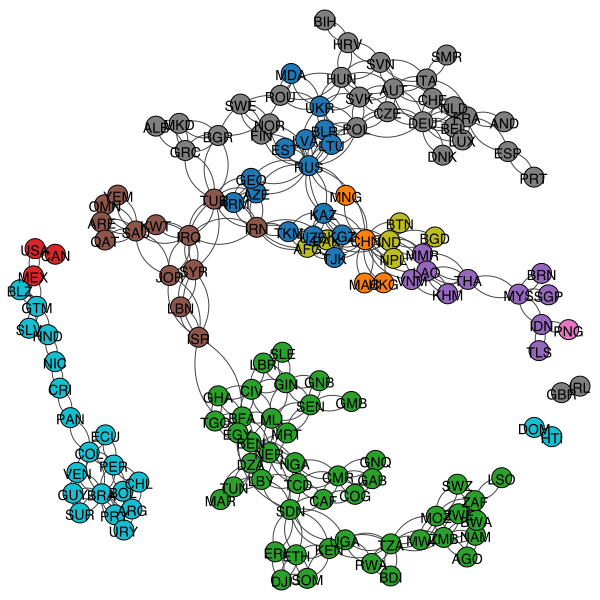

In [18]:
df_network = df.drop_duplicates(['iso_o','iso_d','contig'])
df_network = df_network[df_network.contig == 1]

graph2 = ig.Graph.TupleList(df_network[['iso_o','iso_d']].itertuples(index=False), directed=False)

graph2.vs['color'] = assign_colors(pd.Series(graph2.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['Region_o'])
graph2.vs['label'] = graph2.vs['name']

# vs_size = np.emath.logn(1.2, pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['pop_o'])
ig.plot(graph2)

In [26]:
def get_degree_of_sep(graph, name1, name2):
    a_series = pd.Series(graph.vs['name'])
    an_index = a_series[a_series == 'AFG'].index.tolist()[0]


TypeError: only non-negative integers, strings or igraph.Vertex objects can be converted to vertex IDs

In [81]:
a_series = pd.Series(graph2.vs['name'])
an_index = a_series[a_series == 'AFG'].index.tolist()[0]


def degrees_of_separation(graph, source_name, target_name):
    """
    Returns the number of degrees of separation between two nodes in a graph.
    
    Parameters:
    graph (igraph.Graph): The graph to compute the degrees of separation in.
    source_name (str): The name of the source node.
    target_name (str): The name of the target node.
    
    Returns:
    int: The number of degrees of separation between the source and target nodes.
          Returns None if the nodes are not connected.
    """
    try:
        source_idx = graph.vs.find(name=source_name).index
        target_idx = graph.vs.find(name=target_name).index
        shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]
        return len(shortest_path) - 1
    except ValueError:
        return -1
    
df.apply(lambda x: degrees_of_separation(graph2, x.iso_o, x.iso_d), axis=1)

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_7981/1375436143.py:21: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]


KeyboardInterrupt: 

In [82]:
from multiprocesspandas import applyparallel

df_vis = df.groupby(['iso_o','iso_d'], as_index=False).agg({'newarrival':'sum'})
df_vis['degrees_of_separation'] = df.groupby(['iso_o','iso_d'], as_index=False).agg({'newarrival':'sum'}).apply_parallel(lambda x: degrees_of_separation(graph2, x.iso_o, x.iso_d), axis=0)

 12%|█▏        | 4777/38220 [00:01<00:11, 2957.04it/s]/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_7981/1375436143.py:21: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]
 25%|██▍       | 9554/38220 [00:03<00:11, 2596.13it/s]/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_7981/1375436143.py:21: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]
 37%|███▋      | 14331/38220 [00:05<00:09, 2637.64it/s]/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_7981/1375436143.py:21: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]
 50%|████▉     | 19108/38220 [00:07<00:07, 2619.57it/s]/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_7981/2499168912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vis.groupby('degrees_of_separation').sum().plot.bar()


<Axes: xlabel='degrees_of_separation'>

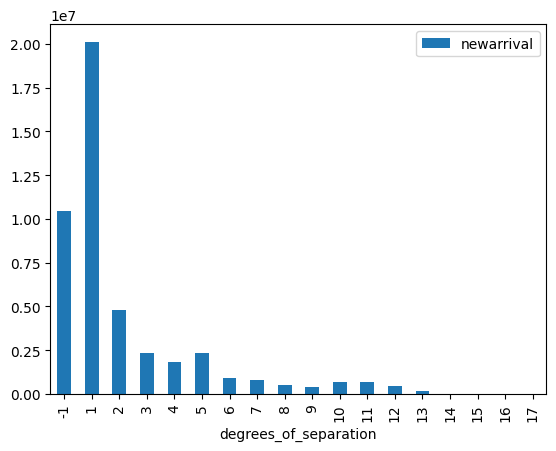

In [87]:
df_vis.groupby('degrees_of_separation').sum().plot.bar()

In [111]:
df[df.Id.isin(['CODUGA','SDNSSD', 'SSDETH', 'SSDUGA', 'CODCOG'])].drop_duplicates('Id')[['Country_o','Country_d','contig']]

,Country_o,Country_d,contig
196950,Democratic Republic of the Congo,Republic of Congo,0
200500,Democratic Republic of the Congo,Uganda,0
785400,South Sudan,Ethiopia,0
788500,South Sudan,Uganda,0
817350,Sudan,South Sudan,0


In [116]:
df_vis[(df_vis.degrees_of_separation == -1) & (df_vis.newarrival > 200000)]

,iso_o,iso_d,newarrival,degrees_of_separation
5690,CAF,COD,275622.0,-1
6617,CHN,USA,346410.0,-1
7056,COD,COG,222132.0,-1
7199,COD,UGA,592157.0,-1
29212,SDN,SSD,281274.0,-1
30865,SSD,ETH,454812.0,-1
30959,SSD,SDN,1001279.0,-1
30989,SSD,UGA,1205472.0,-1


In [94]:
degrees_of_separation(graph2, 'SSD','SDN')

-1

In [107]:
df[df.Id == 'SSDSDN'].drop_duplicates(['iso_o','iso_d'])[['iso_o','iso_d','contig']]

,iso_o,iso_d,contig
788075,SSD,SDN,0


In [95]:
source_idx = graph2.vs.find(name='SSD').index
target_idx = graph2.vs.find(name='SDN').index
shortest_path = graph2.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]

ValueError: no such vertex: 'SSD'

In [42]:
multi.index.get_level_values(0)

Index(['ABW', 'ABW', 'ABW', 'ABW', 'ABW', 'ABW', 'ABW', 'ABW', 'ABW', 'ABW',
       ...
       'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE'],
      dtype='object', name='iso_o', length=4900)

In [36]:
multi = df.groupby(['iso_o','year']).agg({'newarrival':'sum'})
pd.Series(multi.index.get[0]) == 'VEN'

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Name: iso_o, Length: 196, dtype: bool

In [45]:
def multilevel_filter(df, col, val):
    col_index= pd.Series(multi.index.names)[pd.Series(multi.index.names) == col].index[0]
    bool_series = df.index.get_level_values(col_index) == val
    return df[bool_series]


multilevel_filter(multi, 'iso_o','VEN')

0


newarrival
iso_o year            
VEN   2000       172.0
      2001       406.0
      2002       937.0
      2003      2651.0
      2004      2482.0
      2005      1880.0
      2006      1482.0
      2007      1209.0
      2008      1282.0
      2009       903.0
      2010      1002.0
      2011      1222.0
      2012       912.0
      2013      1435.0
      2014      5304.0
      2015     13201.0
      2016     42492.0
      2017    125916.0
      2018   2508056.5
      2019   1524435.0
      2020    572356.0
      2021    664573.0
      2022         0.0
      2023         0.0
      2024         0.0

<Axes: xlabel='year'>

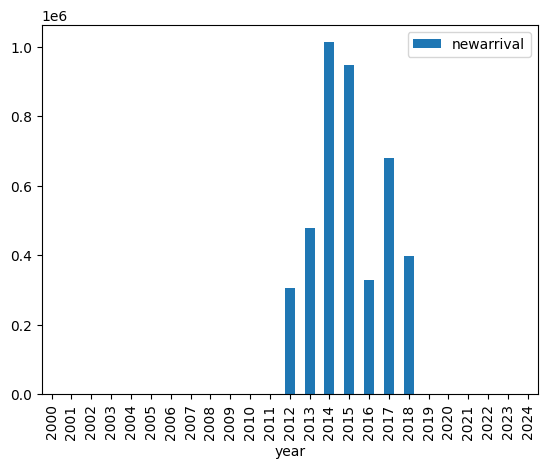

In [132]:
df[(df.Country_o=='Syria') & (df.Country_d == 'Türkiye')].groupby('year').agg({'newarrival':'sum'}).plot.bar()

<Axes: xlabel='year,Country_d'>

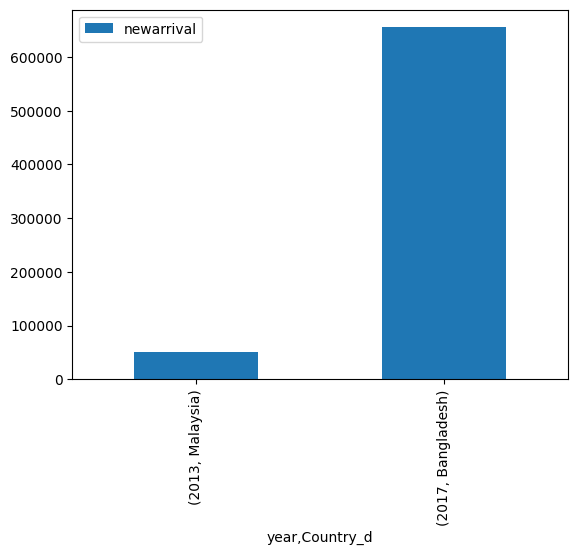

In [89]:
df[(df.Country_o=='Myanmar')  & (df.newarrival > 50000)].groupby(['year','Country_d']).agg({'newarrival':'sum'}).plot.bar()

In [119]:
df[df.newarrival > 10].drop_duplicates(subset=['Country_o','year'])[['iso_o',	'iso_d',	'year', 'newarrival']]

,iso_o,iso_d,year,newarrival
16,AFG,ALB,2016,64.0
17,AFG,ALB,2017,29.0
18,AFG,ALB,2018,36.0
225,AFG,AUS,2000,1326.0
226,AFG,AUS,2001,2161.0
...,...,...,...,...
960617,ZWE,AUS,2017,51.0
960618,ZWE,AUS,2018,24.0
960619,ZWE,AUS,2019,55.0
960620,ZWE,AUS,2020,36.0


In [145]:
df[df.Country_d == 'Italy'].sort_values(by='newarrival', ascending=False)

,iso_o,iso_d,year,pop_o,CPI_o,GDP_PP_o,Country_o,GDP_PPP_o,island_o,area_o,...,index0asylum,Id,contig,comlang_off,comlang_ethno,colony,comcol,col45,smctry,dist
629266,NGA,ITA,2016,185.960,18.546,5284.90,Nigeria,0.838,0,923768.0,...,0,NGAITA,0,0,0,0,0,0,0,4043.532959
629267,NGA,ITA,2017,190.873,15.368,5190.36,Nigeria,0.810,0,923768.0,...,0,NGAITA,0,0,0,0,0,0,0,4043.532959
629265,NGA,ITA,2015,181.137,9.554,5514.78,Nigeria,0.879,0,923768.0,...,0,NGAITA,0,0,0,0,0,0,0,4043.532959
648866,PAK,ITA,2016,200.190,3.191,5054.38,Pakistan,0.870,0,882872.0,...,0,PAKITA,0,0,0,0,0,0,0,5300.738281
75542,BGD,ITA,2017,159.671,5.944,5226.65,Bangladesh,0.682,0,143998.0,...,0,BGDITA,0,0,0,0,0,0,0,7311.513672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496969,LTU,ITA,2019,2.794,2.730,37237.46,Lithuania,0.080,0,65300.0,...,0,LTUITA,0,0,0,0,0,0,0,1706.050537
496970,LTU,ITA,2020,2.795,-0.072,37178.19,Lithuania,0.082,0,65300.0,...,0,LTUITA,0,0,0,0,0,0,0,1706.050537
496971,LTU,ITA,2021,2.803,10.702,38927.30,Lithuania,0.082,0,65300.0,...,0,LTUITA,0,0,0,0,0,0,0,1706.050537
496972,LTU,ITA,2022,2.831,16.479,39227.17,Lithuania,0.081,0,65300.0,...,0,LTUITA,0,0,0,0,0,0,0,1706.050537


<Axes: xlabel='year'>

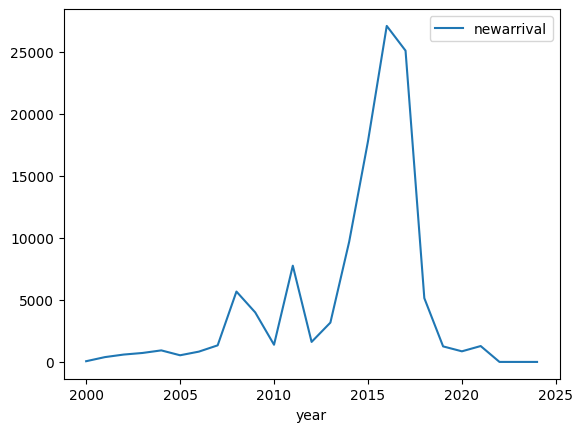

In [144]:
df[df.Id  == 'NGAITA'][['year','newarrival']].set_index('year').plot.line()

In [150]:
df[df.Country_o == 'Nigeria'].sort_values(by='newarrival', ascending=False).Country_d

630345       Niger
630344       Niger
630340       Niger
630341       Niger
627964    Cameroon
            ...   
629181        Iraq
629182        Iraq
629183        Iraq
629184        Iraq
632049    Zimbabwe
Name: Country_d, Length: 4875, dtype: object

In [151]:
df[df.Id == 'NGANER'][['year','newarrival']].set_index('year')

,newarrival
year,
2000,0.0
2001,0.0
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,0.0


In [154]:
df[df.Region_o == 'Africa'].sort_values('newarrival',ascending=False)

,iso_o,iso_d,year,pop_o,CPI_o,GDP_PP_o,Country_o,GDP_PPP_o,island_o,area_o,...,contig,comlang_off,comlang_ethno,colony,comcol,col45,smctry,dist,Region_o,Region_d
788516,SSD,UGA,2016,12.231,401.732,970.717,South Sudan,0.011,0,644329.0,...,0,0,0,0,0,0,0,8068.000000,Africa,Africa
788092,SSD,SDN,2017,12.585,153.424,888.762,South Sudan,0.009,0,644329.0,...,0,0,0,0,0,0,0,8068.000000,Africa,Africa
788517,SSD,UGA,2017,12.585,153.424,888.762,South Sudan,0.009,0,644329.0,...,0,0,0,0,0,0,0,8068.000000,Africa,Africa
213111,CIV,LBR,2011,21.397,1.967,3342.140,Côte d'Ivoire,0.074,0,322463.0,...,1,0,0,0,0,0,0,755.893066,Africa,Africa
785414,SSD,ETH,2014,11.531,9.880,1190.670,South Sudan,0.016,0,644329.0,...,0,0,0,0,0,0,0,8068.000000,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285720,ETH,GMB,2020,97.175,18.169,2756.870,Ethiopia,0.213,0,1127127.0,...,0,1,0,0,0,0,0,6064.751953,Africa,Africa
285721,ETH,GMB,2021,99.701,35.090,2855.350,Ethiopia,0.213,0,1127127.0,...,0,1,0,0,0,0,0,6064.751953,Africa,Africa
285722,ETH,GMB,2022,101.296,32.486,2918.290,Ethiopia,0.215,0,1127127.0,...,0,1,0,0,0,0,0,6064.751953,Africa,Africa
285723,ETH,GMB,2023,102.917,26.044,3024.280,Ethiopia,0.221,0,1127127.0,...,0,1,0,0,0,0,0,6064.751953,Africa,Africa
